In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('cleaner.csv')

In [4]:
df.head()

Unnamed: 0                       Consumer_complaint_narrative  \
0           0  natual person living human right usc equifa go...   
1           1  submitting complaint delete following fraudule...   
2           2  last year attempted numerous occasion informat...   
3           3  recently made aware     violating consumer rep...   
4           4                                       credit going   

                                             Product  
0  Credit reporting, credit repair services, or o...  
1  Credit reporting, credit repair services, or o...  
2  Credit reporting, credit repair services, or o...  
3  Credit reporting, credit repair services, or o...  
4  Credit reporting, credit repair services, or o...

In [5]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [6]:
MAX_SEQUENCE_LENGTH=400
EMBEDDING_DIM=100

In [7]:
token=Tokenizer()

In [8]:
df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].astype('str')

In [9]:
token.fit_on_texts(df['Consumer_complaint_narrative'].values)

In [10]:
word_index=token.word_index

In [11]:
len(token.word_index)+1

20760

In [12]:
print(word_index)

{'account': 1, 'payment': 2, 'loan': 3, 'credit': 4, 'would': 5, 'bank': 6, 'time': 7, 'told': 8, 'day': 9, 'received': 10, 'information': 11, 'money': 12, 'call': 13, 'company': 14, 'called': 15, 'report': 16, 'back': 17, 'amount': 18, 'get': 19, 'month': 20, 'pay': 21, 'one': 22, 'email': 23, 'sent': 24, 'never': 25, 'number': 26, 'also': 27, 'made': 28, 'said': 29, 'due': 30, 'card': 31, 'interest': 32, 'service': 33, 'paid': 34, 'debt': 35, 'could': 36, 'consumer': 37, 'phone': 38, 'letter': 39, 'year': 40, 'check': 41, 'still': 42, 'make': 43, 'since': 44, 'balance': 45, 'u': 46, 'fee': 47, 'asked': 48, 'charge': 49, 'customer': 50, 'well': 51, 'transaction': 52, 'late': 53, 'help': 54, 'even': 55, 'date': 56, 'issue': 57, 'request': 58, 'need': 59, 'fund': 60, 'reporting': 61, 'complaint': 62, 'car': 63, 'financial': 64, 'contacted': 65, 'state': 66, 'name': 67, 'statement': 68, 'take': 69, 'know': 70, 'please': 71, 'see': 72, 'new': 73, 'right': 74, 'first': 75, 'business': 76, 

In [13]:
print('Found %s unique tokens.' % len(word_index))

Found 20759 unique tokens.


In [14]:
X=token.texts_to_sequences(df['Consumer_complaint_narrative'].values)

In [15]:
X=pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)

In [16]:
print('Shape of data tensor',X.shape)

Shape of data tensor (14000, 400)


In [17]:
Y=pd.get_dummies(df['Product']).values

In [18]:
print('Shape of label tensor',Y.shape)

Shape of label tensor (14000, 9)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=68)

In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(11200, 400) (11200, 9)
(2800, 400) (2800, 9)


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D,Dropout
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(Embedding(92507,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(128,5,activation="relu"))
model.add(MaxPooling1D(5))
model.add(SpatialDropout1D(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(SpatialDropout1D(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(9, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 100)          9250700   
                                                                 
 spatial_dropout1d (SpatialD  (None, 400, 100)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 396, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 79, 128)          0         
 )                                                               
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 79, 128)          0         
 lDropout1D)                                                     
                                                        

In [25]:
epochs=10
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/10
158/158 [==============================] - 28s 172ms/step - loss: 2.2479 - accuracy: 0.1828 - val_loss: 2.2865 - val_accuracy: 0.0911
Epoch 2/10
158/158 [==============================] - 28s 177ms/step - loss: 1.7433 - accuracy: 0.3438 - val_loss: 2.5076 - val_accuracy: 0.0812
Epoch 3/10
158/158 [==============================] - 28s 175ms/step - loss: 1.1626 - accuracy: 0.5602 - val_loss: 1.6550 - val_accuracy: 0.3786
Epoch 4/10
158/158 [==============================] - 28s 176ms/step - loss: 0.7996 - accuracy: 0.7231 - val_loss: 0.8552 - val_accuracy: 0.7268
Epoch 5/10
158/158 [==============================] - 28s 177ms/step - loss: 0.5611 - accuracy: 0.8128 - val_loss: 0.7726 - val_accuracy: 0.7491
Epoch 6/10
158/158 [==============================] - 28s 177ms/step - loss: 0.3953 - accuracy: 0.8723 - val_loss: 0.6467 - val_accuracy: 0.8062
Epoch 7/10
158/158 [==============================] - 28s 178ms/step - loss: 0.3123 - accuracy: 0.8989 - val_loss: 0.6758 - val_ac

In [26]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

88/88 [==============================] - 1s 13ms/step - loss: 0.7175 - accuracy: 0.8246
Test Set Loss 0.7175124883651733
Test Set Accuracy 0.8246428370475769


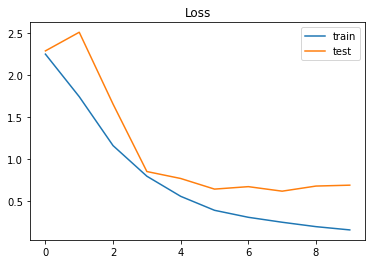

In [27]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

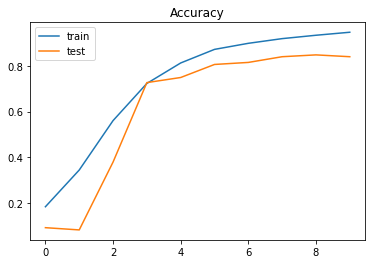

In [28]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [29]:
new_complaint = ['i requested loan for my daughter for her education but i didnt get any assistance']
seq = token.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Vehicle loan or lease',                                                 
'Debt collection',                                                                 
'Checking or savings account',                                 
'Money transfer, virtual currency, or money service',                          
'Mortgage',                                                                        
'Payday loan, title loan, or personal loan',                                   
'Credit reporting, credit repair services, or other personal consumer reports',
'Student loan',                                                                    
'Credit card or prepaid card']
print(pred)
print(labels[np.argmax(pred)])

[[1.46234669e-07 1.93164578e-05 8.43218341e-03 1.50506548e-03
  1.18503415e-07 3.08125367e-04 1.99523265e-03 9.87505555e-01
  2.34259467e-04]]
Student loan


In [30]:
model = Sequential()
model.add(Embedding(92507,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(SpatialDropout1D(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128,5,activation="relu"))
model.add(MaxPooling1D(5))
model.add(SpatialDropout1D(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(9, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 100)          9250700   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 400, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 396, 128)          64128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 79, 128)          0         
 1D)                                                             
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 79, 128)          0         
 lDropout1D)                                                     
                                                      

In [31]:
epochs=10
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/10
158/158 [==============================] - 29s 181ms/step - loss: 2.2548 - accuracy: 0.1867 - val_loss: 2.4403 - val_accuracy: 0.0625
Epoch 2/10
158/158 [==============================] - 30s 192ms/step - loss: 1.7581 - accuracy: 0.3217 - val_loss: 2.6248 - val_accuracy: 0.0759
Epoch 3/10
158/158 [==============================] - 30s 192ms/step - loss: 1.2789 - accuracy: 0.5042 - val_loss: 1.9371 - val_accuracy: 0.2741
Epoch 4/10
158/158 [==============================] - 30s 188ms/step - loss: 0.8172 - accuracy: 0.7096 - val_loss: 1.0851 - val_accuracy: 0.6143
Epoch 5/10
158/158 [==============================] - 29s 185ms/step - loss: 0.5483 - accuracy: 0.8170 - val_loss: 0.6931 - val_accuracy: 0.7875
Epoch 6/10
158/158 [==============================] - 29s 183ms/step - loss: 0.4054 - accuracy: 0.8675 - val_loss: 0.6605 - val_accuracy: 0.8107
Epoch 7/10
158/158 [==============================] - 29s 183ms/step - loss: 0.3027 - accuracy: 0.9048 - val_loss: 0.6072 - val_ac

In [32]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

88/88 [==============================] - 1s 14ms/step - loss: 0.7132 - accuracy: 0.8171
Test Set Loss 0.7131869792938232
Test Set Accuracy 0.8171428442001343
